# Helteck Project
---
**Fecha de Desarrollo:**

- 22-Feb-2024

**Notebook**

- Julio César Martínez

**Tipo de Proyecto:**

- Data Science

## Introducción

En la era actual de la medicina, el poder de la tecnología está transformando radicalmente la forma en que diagnosticamos y tratamos enfermedades. Entre las innovaciones más prometedoras, el aprendizaje automático, especialmente la clasificación, ha surgido como una herramienta invaluable para mejorar la precisión y la eficiencia en el diagnóstico médico.

Este proyecto se centra en la aplicación de técnicas de aprendizaje automático en el campo de la medicina, específicamente en la clasificación de enfermedades con el objetivo de proporcionar diagnósticos más rápidos y precisos, lo que a su vez puede mejorar los resultados del paciente y optimizar el uso de recursos médicos. Con un enfoque en la clasificación, este proyecto busca explorar cómo los algoritmos de aprendizaje automático pueden analizar datos clínicos, imágenes médicas y otros biomarcadores para identificar patrones que ayuden a distinguir entre diferentes condiciones médicas con alta precisión y confiabilidad.

A través de esta investigación, se espera avanzar en la capacidad de los profesionales de la salud para diagnosticar y tratar enfermedades de manera más efectiva, mejorando así la calidad de vida de los pacientes y contribuyendo al avance general de la medicina.

## Tabla de Contenido

1. Descargar los datos
2. Análisis de cada Variable
3. Análisis de Relación entre Variables


## Objetivos

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [150]:
# Importa las librerias <3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [151]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/'
#Complementos con la dirección especifica de la base de datos que queremos.
MEDICAMENTOS  = 'Capitulo_3/drug200.csv'

In [152]:
# Visualiza el DataFrame
df = pd.read_csv(DOWNLOAD_ROOT + MEDICAMENTOS)

In [153]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

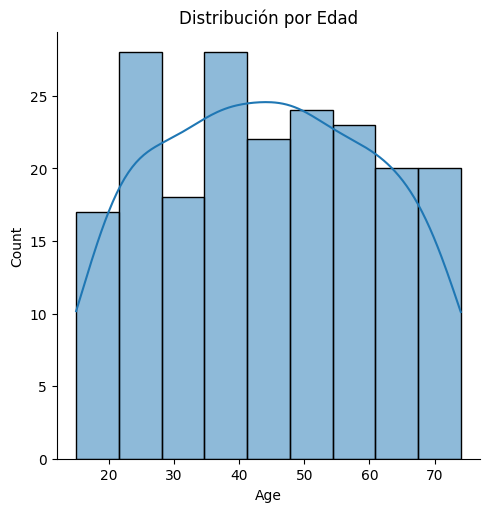

In [154]:
# Distribución de Edad
plt.figure(figsize=(9,5))
sns.displot(df['Age'], kde=True)
plt.title('Distribución por Edad');

In [155]:
# Distribución de Género
print('Cantidad de hombres y mujeres que hay')
print()
df['Sex'].value_counts()

Cantidad de hombres y mujeres que hay



M    104
F     96
Name: Sex, dtype: int64

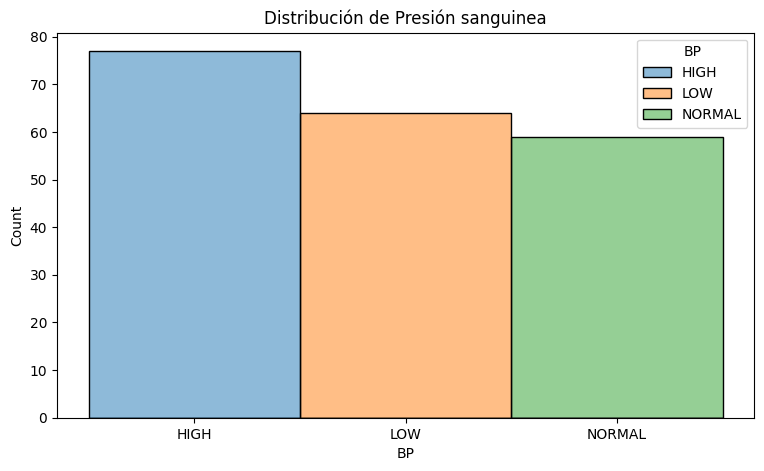

In [156]:
# Análisis de Presión Sanguinea
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='BP',hue='BP')
plt.title('Distribución de Presión sanguinea');

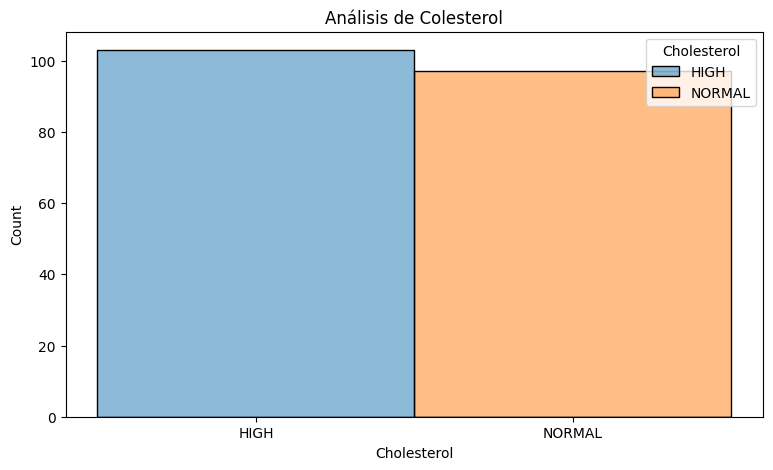

In [157]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize=(9,5))
sns.histplot(data=df,x='Cholesterol',hue='Cholesterol')
plt.title('Análisis de Colesterol');

In [158]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<Figure size 900x500 with 0 Axes>

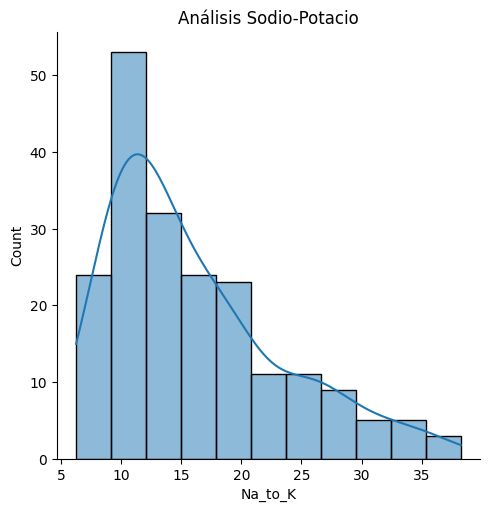

In [159]:
# Revisando sodio-potacio
plt.figure(figsize=(9,5))
sns.displot(df['Na_to_K'],kde=True)
plt.title('Análisis Sodio-Potacio');

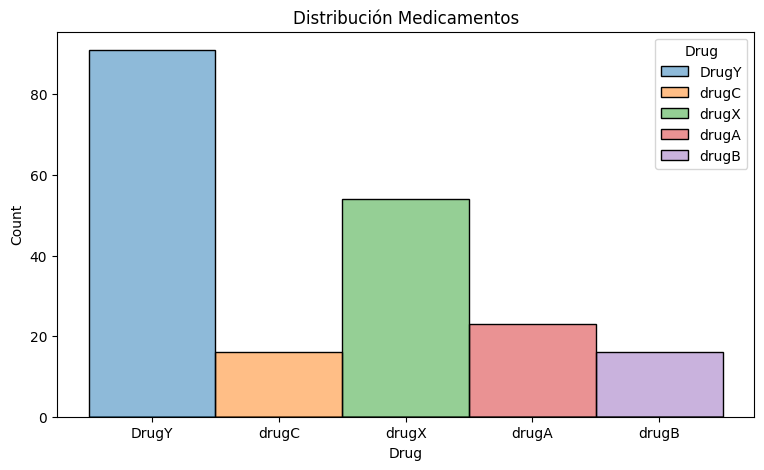

In [160]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize=(9,5))
sns.histplot(data=df, x=df['Drug'],hue='Drug')
plt.title('Distribución Medicamentos');

In [161]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


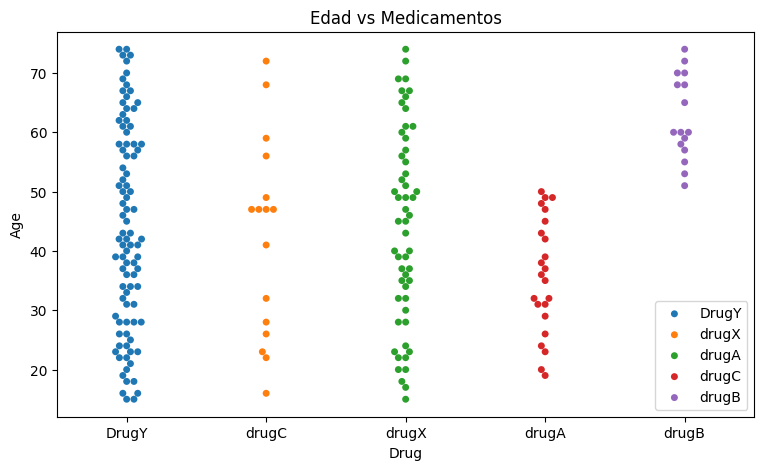

In [162]:
## La relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize=(9,5))
sns.swarmplot(x='Drug',y='Age',data=df,hue='Drug')
plt.legend(df['Drug'].value_counts().index)
plt.title('Edad vs Medicamentos');

In [163]:
# La relación entre el el Género y los Medicamentos 💊 que se les da
# Armar una tabla para poder graficarlas
df_sex_drugs = df.groupby(['Sex','Drug']).size().reset_index(name='Count')
df_sex_drugs

,Sex,Drug,Count
0,F,DrugY,47
1,F,drugA,9
2,F,drugB,6
3,F,drugC,7
4,F,drugX,27
5,M,DrugY,44
6,M,drugA,14
7,M,drugB,10
8,M,drugC,9
9,M,drugX,27


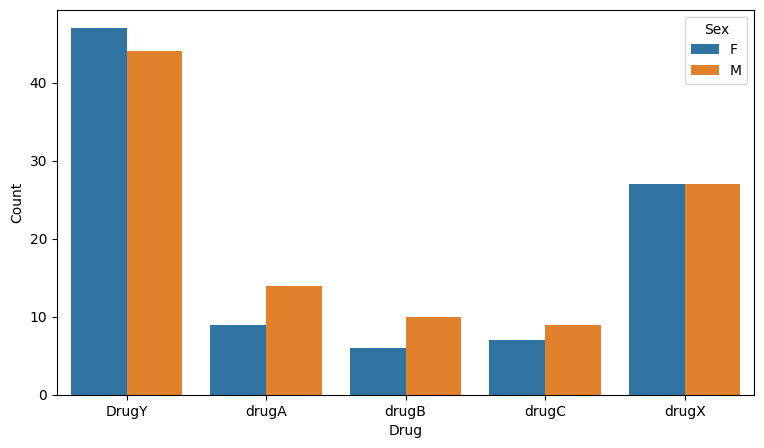

In [164]:
plt.figure(figsize=(9,5))
sns.barplot(x='Drug',y='Count',data=df_sex_drugs,hue='Sex');

In [165]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(['BP','Drug']).size().reset_index(name='Count')
df_BP_Drug

,BP,Drug,Count
0,HIGH,DrugY,38
1,HIGH,drugA,23
2,HIGH,drugB,16
3,LOW,DrugY,30
4,LOW,drugC,16
5,LOW,drugX,18
6,NORMAL,DrugY,23
7,NORMAL,drugX,36


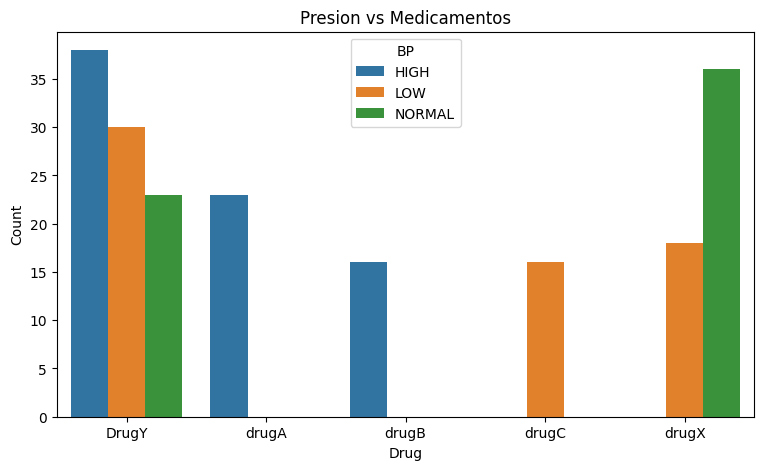

In [166]:
plt.figure(figsize=(9,5))
sns.barplot(x='Drug',y='Count',hue='BP',data=df_BP_Drug)
plt.title('Presion vs Medicamentos');

In [167]:
# Grafica (con una gráfica de barras) la relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(['Drug','Cholesterol']).size().reset_index(name='Count')
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


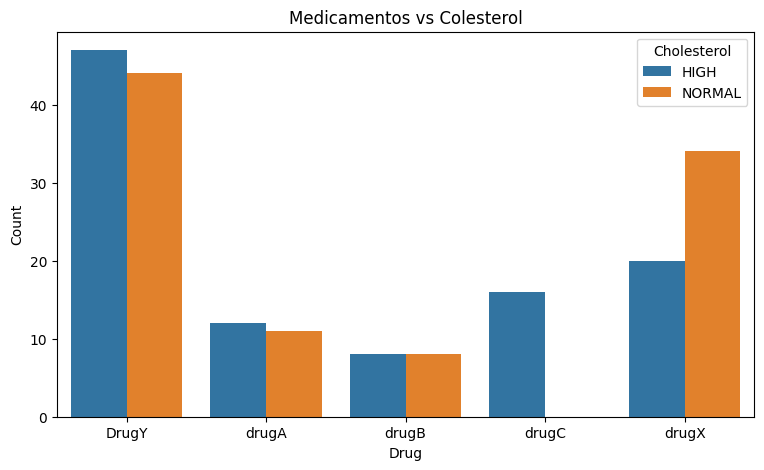

In [168]:
plt.figure(figsize=(9,5))
sns.barplot(x='Drug',y='Count',hue='Cholesterol',data=df_CH_Drug)
plt.title('Medicamentos vs Colesterol');

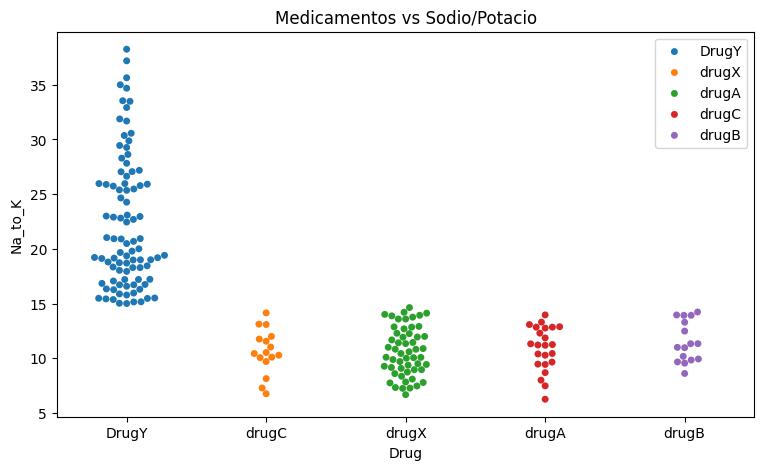

In [169]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize=(9,5))
sns.swarmplot(x='Drug',y='Na_to_K',data=df,hue='Drug')
plt.legend(df['Drug'].value_counts().index)
plt.title('Medicamentos vs Sodio/Potacio');

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [170]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc

def label_encoder(datos_categoria):
  le = LabelEncoder()
  df[datos_categoria]=le.fit_transform(df[datos_categoria])

variables = ['Sex','BP','Cholesterol','Na_to_K','Drug']

for L in variables:
  label_encoder(L)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [171]:
# Crear set de entrenamiento y set de prueba
x = df.drop('Drug',axis=1)
y = df['Drug']

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

In [172]:
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
    )

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [173]:
## Crear modelo para medicamento
y_train_y = (y_train == 0)
y_test_y = (y_test == 0)

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [174]:
## Modelo SGD = Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train,y_train_y)

SGDClassifier()

In [175]:
df.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0


In [176]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado
sgd.predict([x_train.loc[0]]),y_train_y.loc[0]

(array([ True]), True)

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [177]:
# Realiza una Cross validation/K-Folds
cross_val_score(
    sgd,
    x_train,
    y_train_y,
    cv=3,
    scoring="accuracy")

array([0.87037037, 0.81132075, 0.79245283])


**cv:** número de dobleses

**scoring:** accuracy (será nuestra medida de desempeño)

In [178]:
# Modelo que nunca es Y
class NuncaC(BaseEstimator):
  def fit(self,X,y=None):
    return self
  def predict(self,X):
    return np.zeros((len(X),1),dtype=bool)

nunca_y = NuncaC()
cross_val_score(
    nunca_y,
    x_train,
    y_train_y,
    cv=3,
    scoring="accuracy")

array([0.57407407, 0.52830189, 0.47169811])

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [179]:
# Matriz de confusión
y_train_pred = cross_val_predict(
    sgd,x_train,y_train_y,cv=3)
confusion_matrix(
    y_train_y,y_train_pred)

array([[51, 33],
       [ 4, 72]])

![matriz.png](attachment:3f90b91e-ff94-40c8-b015-0fd5b2eb1586.png)

**Verdaderos Negativos**: esquina superior izquierda

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [180]:
p = precision_score(y_train_y, y_train_pred)
r = recall_score(y_train_y, y_train_pred)
p,r

(0.6857142857142857, 0.9473684210526315)

$Precision = vp/vp + fp$

$Recall = vp / vp + fn$

In [181]:
#Cambiar de clasificador a RandomForest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train_y)
#Hacer cross validation score
y_train_pred = cross_val_predict(rfc,x_train,y_train_y,cv=3)

In [182]:
# Matriz de confusión
confusion_matrix(y_train_y,y_train_pred)

array([[84,  0],
       [ 2, 74]])

In [183]:
#Calcular presicion and recall
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r

(1.0, 0.9736842105263158)

In [184]:
# F1
f1_score(y_train_y,y_train_pred)

0.9866666666666666

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [185]:
#Puntación de un paciente aleatorio
df.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0


In [186]:
y_score = sgd.decision_function([x_train.loc[0]])
y_score

array([57138.10991208])

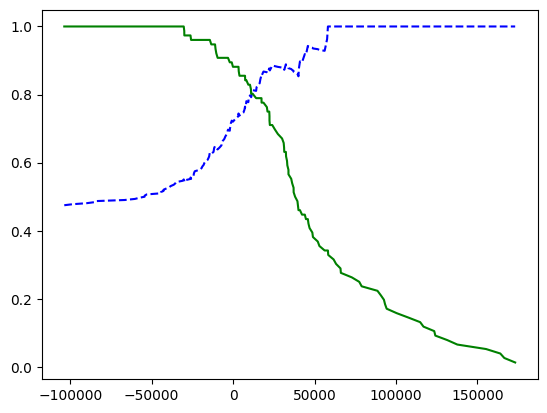

In [187]:
#Graficar la precisión y recall
y_scores = cross_val_predict(sgd,x_train,y_train_y,method='decision_function')
precisions,recalls,umbrales = precision_recall_curve(y_train_y, y_scores)
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará
#Graficar la precisión y recall, ahora si
plt.plot(umbrales,precisions[:-1],'b--',label='Precision')
plt.plot(umbrales,recalls[:-1],'g-',label='Recall')
plt.show();

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [188]:
#Supon que ya lo pensaste y querías un umbral  90
umbral_90 = umbrales[np.argmax(precisions >= 0.9)]
umbral_90

44047.292055006954

In [189]:
#Arroja la precisión y recall para un umbral de 90
y_train_90 = (y_scores >= umbral_90)

In [190]:
p = precision_score(y_train_y,y_train_90)
r = recall_score(y_train_y,y_train_90)
p,r

(0.918918918918919, 0.4473684210526316)

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [191]:
#Importar roc_curve
fpr, tpr, umbrales = roc_curve(y_train_y, y_scores)

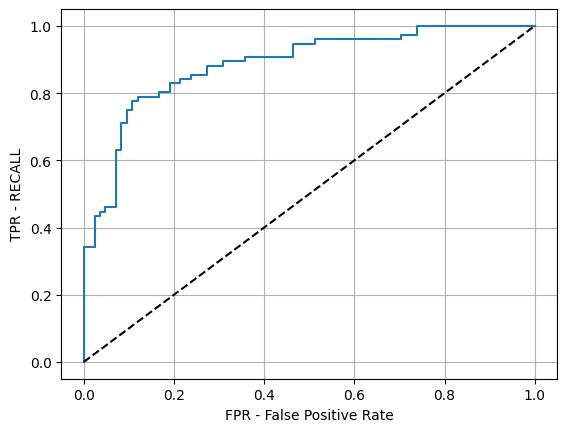

In [192]:
#Graficar la curva ROC
plt.plot(fpr,tpr,label='ROC Curve')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - RECALL')
plt.grid()
plt.show();

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [193]:
#Calcular el puntaje de la curva
roc_auc_score(y_train_y,y_scores)

0.8869047619047619

In [194]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc,x_train,y_train_y,cv=3,method='predict_proba')
y_scores_forest = y_forest[:,1]
fpr_forest,tpr_forest,umbral_forest = roc_curve(y_train_y,y_scores_forest)

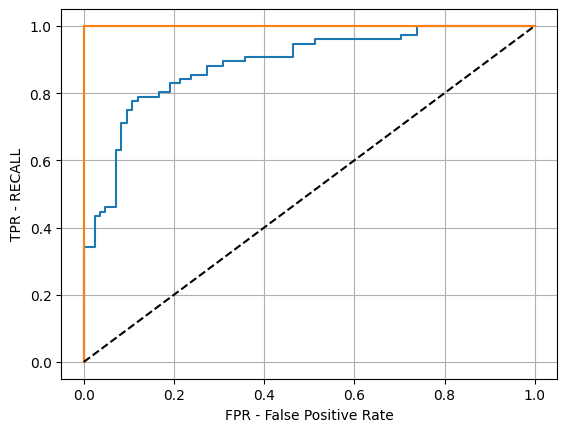

In [195]:
#Graficar la curva ROC y la predicción de random forest
plt.plot(fpr,tpr,label='ROC Curve')
plt.plot(fpr_forest,tpr_forest, label='RF ROC CURVE')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - RECALL')
plt.grid()
plt.show();

In [196]:
#Calcular el puntaje (área bajo la curva) de random forest
roc_auc_score(y_train_y,y_scores_forest)

1.0

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [197]:
# Importar SVC=Support Vector Classifier
# Predecir a un humano aleatorio para ver que todo este funcionando bien
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [198]:
# Revisar al paciente cero
df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3


In [199]:
# Predecir al paciente cero
prediccion_cero = svm.predict([x_train.loc[0]])
print('prediccion paciente cero:', prediccion_cero)

prediccion paciente cero: [0]


In [200]:
#Utilizar decision_function para observar los puntajes de cada medicina
#Decidirá por el qué tenga mayor puntaje
probabilidad_decision = svm.decision_function([x_train.loc[0]])
print('probabilidad de decisión entre los 5 medicamentos:\n', probabilidad_decision)

probabilidad de decisión entre los 5 medicamentos:
 [[ 4.29314545  1.79128957  0.76838448 -0.27065817  3.16462775]]


En la modalidad 1vs1 svm clasifica como correcto la medicina cero gracias a su alto puntaje con 4.29 aunque la medicina 4 también se acercó mucho, eso es algo que llama la atención.

In [201]:
#Ahora, utiliza el clasificador multiclase
#Predecir a un humano ahora con este clasificador
svm = OneVsRestClassifier(SVC())
svm.fit(x_train, y_train)

print('predicción paciente cero')
svm.predict([x_train.loc[0]])

predicción paciente cero


array([0])

In [202]:
#Utilizar decision_function para observar los puntajes de cada medicina
print('puntajes de decisión para el paciente cero:')
svm.decision_function([x_train.loc[0]])

puntajes de decisión para el paciente cero:


array([[ 2.31466773, -1.01816059, -1.01847764, -1.00071976, -1.08034559]])

Se puede ver como en la modalidad 1 vs rest, el modelo clasifica el resto de medicinas con valores negativos, mientras que la medicina cero la clasifica con 2.3. Esto significa que este modelo es más seguro a la hora de predecir en comparación con el modelo anterior.

In [203]:
#campararlo con los datos obtenidos de sgd.fit
sgd.fit(x_train,y_train)

SGDClassifier()

In [204]:
print('prediccion paciente cero con sgd')
sgd.predict([x_train.loc[0]])

prediccion paciente cero con sgd


array([0])

In [205]:
print('función de decisión paciente cero')
sgd.decision_function([x_train.loc[0]])

función de decisión paciente cero


array([[ 49496.6361675 , -19777.465063  , -28216.39888727,
           891.49977022, -13315.07509832]])

***

## <span style="color:green">8. Analizar Errores</span>

In [206]:
#Hacer un clasificador de random forest
rfc.fit(x_train,y_train)

print('predicción paciente cero con rfc')
rfc.predict([x_train.loc[0]])

predicción paciente cero con rfc


array([0])

In [207]:
#Utilizar la matriz de confusión
y_pred  = cross_val_predict(rfc,x_train,y_train,cv=3)
conf_mx = confusion_matrix(y_train, y_pred)

In [208]:
print('matriz de confusión')
conf_mx

matriz de confusión


array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]])

In [209]:
#utilizar ahora SGD
y_train_pred  = cross_val_predict(sgd,x_train,y_train,cv=3)
conf_mx = confusion_matrix(y_train, y_pred)

In [210]:
print('matriz de confusión para sgd train')
conf_mx

matriz de confusión para sgd train


array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]])

In [211]:
y_test_pred = sgd.predict(x_test)
conf_mx_test = confusion_matrix(y_test,y_test_pred)

print('matriz de confusion para sgd test')
conf_mx_test

matriz de confusion para sgd test


array([[15,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  1],
       [ 0,  0,  0,  2,  1],
       [ 1,  0,  0,  0,  4],
       [ 5,  0,  0,  2,  4]])

---

## 9 Conclusiones

- El objetivo de este proyecto fue desarrollar un modelo de clasificación que nos ayudara a escoger medicamentos para los pacientes de acuerdo a características como la edad, género, niveles de colesterol, sodio, potacio, etc.

- Dentro de nuestra investigación, descubrimos que el mejor modelo de machine learning para clasificar a cada paciente, es el modelo **Random Forest**, el cual clasifico perfectamente a cada paciente dentro del set de pruebas, esta información se corrobora gracias al análsis de errores que se muestra en **la matriz de confusión**.

- Esperemos que con este resultado, este modelo pueda servir para ayudar a más médicos, consultorios y hospitales en pro de sus pacientes medicándolos de la manera correcta.